# Startup Transformation

### Análise dos dados de uma startup a fim de obter-se as seguintes respostas:

* A empresa está em boa saúde financeira?
* A empresa precisa demitir algum funcionário?
* A empresa deve permitir que os funcionários trabalhem em casa permanentemente?

In [1]:
# Importa as bibliotecas

from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Carrega os dados a serem analisados

financial_data = pd.read_csv('financial_data.csv')
expense_overview = pd.read_csv('expenses.csv')
employees = pd.read_csv('employees.csv', encoding='unicode_escape')

(   Month  Revenue  Expenses
 0      1  1420000    510000
 1      2  1200000    532000
 2      3  1050000    551000
 3      4   920000    612000
 4      5   807000    628000,
        Expense  Proportion
 0     Salaries        0.62
 1  Advertising        0.15
 2  Office Rent        0.15
 3    Equipment        0.03
 4    Utilities        0.03,
                 Name  Salary  Productivity  Commute Time
 0     Mason Pender     87902         29.91         16.79
 1          Mia Rew     95672         49.91         44.48
 2   Jalisa Kroenke    177864         78.00         19.40
 3  Krystal Homeyer    186643         24.36         42.06
 4    Kiana Wishart    167148          4.08         25.58)

#### Análise dos dados financeiros

In [8]:
financial_data.head()

,Month,Revenue,Expenses
0,1,1420000,510000
1,2,1200000,532000
2,3,1050000,551000
3,4,920000,612000
4,5,807000,628000


In [9]:
# Categorização dos dados em meses, receita e despesas

month = financial_data['Month']
revenue = financial_data['Revenue']
expenses = financial_data['Expenses']

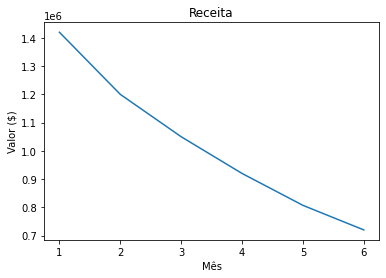

In [10]:
# Plota a relação entre mês e receita

plt.plot(month, revenue)
plt.xlabel('Mês')
plt.ylabel('Valor ($)')
plt.title('Receita')
plt.show()

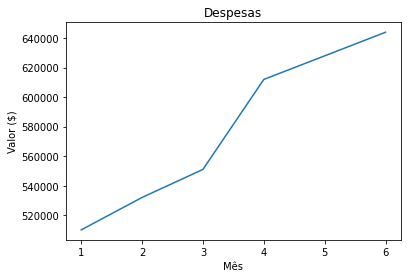

In [11]:
# Plota a relação entre mês e despesas

#plt.clf()
plt.plot(month, expenses)
plt.xlabel('Mês')
plt.ylabel('Valor ($)')
plt.title('Despesas')
plt.show()

#### Análise dos dados de despesas

In [12]:
expense_overview.head()

,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,Equipment,0.03
4,Utilities,0.03


In [13]:
# Categoriza as informações de despesas

expense_categories = expense_overview['Expense']
proportions = expense_overview['Proportion']

In [20]:
# Cria categorias de despesas

expense_categories = ['Salários', 'Marketing', 'Aluguel de Escritório', 'Outros']
proportions = [0.62, 0.15, 0.15, 0.08]

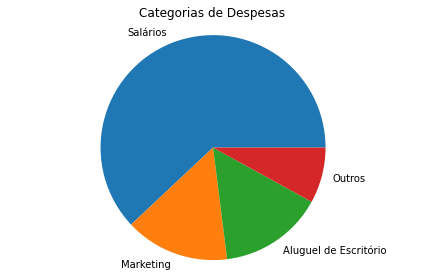

In [21]:
# Plota um gráfico de setores com as informações

#plt.clf()
plt.pie(proportions, labels=expense_categories)
plt.title('Categorias de Despesas')
plt.axis('Equal')
plt.tight_layout()
plt.show()

#### Análise dos dados de funcionários

In [22]:
employees.head()

,Name,Salary,Productivity,Commute Time
0,Mason Pender,87902,29.91,16.79
1,Mia Rew,95672,49.91,44.48
2,Jalisa Kroenke,177864,78.00,19.40
3,Krystal Homeyer,186643,24.36,42.06
4,Kiana Wishart,167148,4.08,25.58


In [24]:
# Ordena os funcionários por produtividade em ordem ascendente

sorted_productivity = employees.sort_values(by=['Productivity'])

In [25]:
# Encontra e armazena os 100 funcionários menos produtivos que possam ser cortados do quadro de colaboradores

employees_cut = sorted_productivity.head(100)
employees_cut

,Name,Salary,Productivity,Commute Time
259,Wilber Rye,111647,0.06,49.42
92,Fredric Gandee,154469,0.24,22.48
252,Johnson Fordham,168684,1.46,22.39
178,Lilia Lemoine,167579,1.67,27.36
162,Hilma Laughton,85506,1.79,36.41
...,...,...,...,...
43,Bernardo Klingenberg,55464,34.52,32.27
186,Ashleigh Istre,178627,34.70,38.67
288,Penni Kimbrough,142680,35.21,49.64
269,Margot Mackenzie,114302,35.79,19.87


In [26]:
# Analisa o tempo de deslocamento dos funcionários

commute_times = employees['Commute Time']
commute_times.describe()

count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64

In [27]:
# Aplica uma transformação logarítimica aos dados de tempo de deslocamento para normalizar o histograma

commute_times_log = np.log(commute_times)

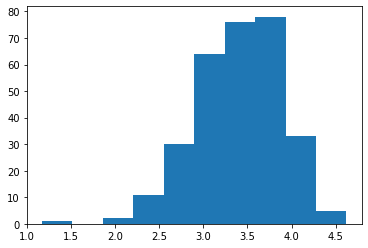

In [28]:
# Plota o histograma dos tempos de deslocamento

#plt.clf()
plt.hist(commute_times_log)
plt.show()